In [1]:
#Import all the necessary packages here
import pandas as pd
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import statsmodels
from statsmodels.tsa.stattools import adfuller

#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,6

/home/sdi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
# this is for 
#1. checking the dataframe values
#2. Feed the delimiter character to the 
#3. Assignt the values under columns

df1= pd.read_csv("/home/sdi/cpu-24.txt",sep = ';',names = ["Timeframe","Symbol","Metric"])
# Take only one VM as of now as it disturbs the order of the timeseries.
df2 = df1.loc[lambda df: df.Symbol== 'vmy2954']
#Drop Symbol column as it doesn't really matter anymore since we filtered out only one VM
df3 = df2.drop('Symbol',axis=1)


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("/home/sdi/cpu-24.txt",sep = ";",names = ["TimeFrame","Symbol","Metric"],index_col='TimeFrame',date_parser=dateparse)
#convert the time column in datetime format
df4 = df.loc[lambda df: df.Symbol== 'vmy2954']
df4 = df4.drop('Symbol',axis=1)
df4.resample("1Min").mean()

,Metric
TimeFrame,
2018-02-12 14:42:00,28.640000
2018-02-12 14:43:00,59.615000
2018-02-12 14:44:00,86.730000
2018-02-12 14:45:00,33.250000
2018-02-12 14:46:00,44.910000
2018-02-12 14:47:00,72.061667
2018-02-12 14:48:00,21.660000
2018-02-12 14:49:00,35.212000
2018-02-12 14:50:00,60.740000


In [4]:
#df4.Metric.plot(figsize=(15,8),title = 'Actual Data', color = 'teal', fontsize=14)
train = df4[1400:]
test = df4[0:1400]
train.resample('60S').mean()
test.resample('60S').mean()

,Metric
TimeFrame,
2018-02-12 14:42:00,28.640000
2018-02-12 14:43:00,59.615000
2018-02-12 14:44:00,86.730000
2018-02-12 14:45:00,33.250000
2018-02-12 14:46:00,44.910000
2018-02-12 14:47:00,72.061667
2018-02-12 14:48:00,21.660000
2018-02-12 14:49:00,35.212000
2018-02-12 14:50:00,60.740000


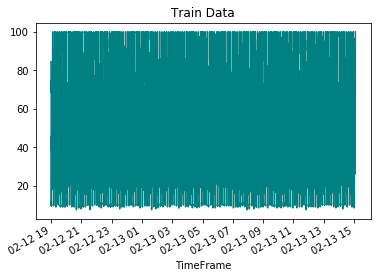

In [5]:
train.Metric.plot(title = "Train Data", color = 'teal')


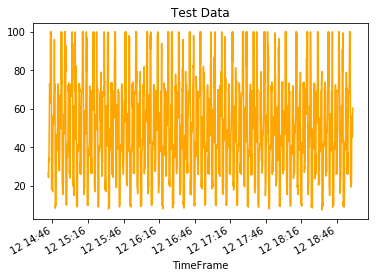

In [6]:
test.Metric.plot(title = "Test Data", color = 'orange')



In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6560 entries, 2018-02-12 18:59:44 to 2018-02-13 15:05:01
Data columns (total 1 columns):
Metric    6560 non-null float64
dtypes: float64(1)
memory usage: 102.5 KB


/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:               D.Metric   No. Observations:                 6559
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -29008.494
Method:                       css-mle   S.D. of innovations             20.161
Date:                Thu, 15 Feb 2018   AIC                          58030.989
Time:                        09:47:07   BIC                          58078.509
Sample:                    02-12-2018   HQIC                         58047.417
                         - 02-13-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0027      0.183      0.015      0.988      -0.355       0.361
ar.L1.D.Metric    -0.1127      0.012     -9.364      0.000      -0.136      -0.089
ar.L2.D.Metric     0.0055      0.012

/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


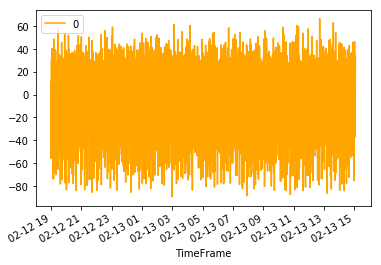

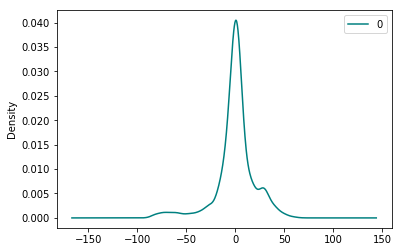

                 0
count  6559.000000
mean     -0.002518
std      20.163067
min     -89.186672
25%      -5.652697
50%       0.665331
75%       7.403386
max      66.104316


In [8]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.Metric, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(color= 'orange')
plt.show()
residuals.plot(kind='kde', color= 'teal')
plt.show()
print(residuals.describe())

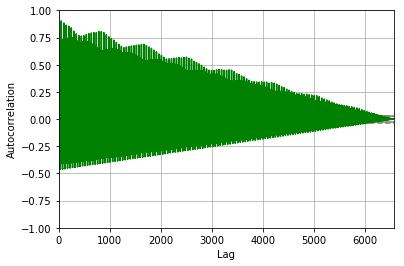

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.Metric.astype('float64'), color= 'green' )
plt.show()

In [10]:
from tqdm import tqdm

X = train.Metric.values
size = int(len(X) * 0.66)
train_in, test_in = X[0:size], X[size:len(X)]
history = [x for x in train_in]
predictions_in = list()
print('Total Test cases: {}'.format(len(test_in)))
for t in tqdm(range(len(test_in))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_in.append(yhat)
    obs = test_in[t]
    history.append(obs)

  0%|          | 0/2231 [00:00<?, ?it/s]

Total Test cases: 2231


/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/sdi/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
100%|██████████| 2231/2231 [15:31<00:00,  2.39it/s]


Test MSLE: 0.233


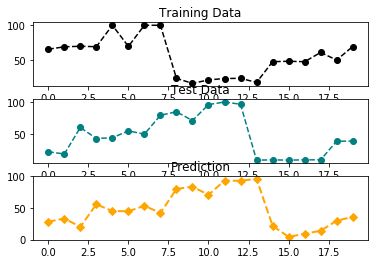

In [56]:

from sklearn.metrics import mean_squared_log_error
error = mean_squared_log_error(test_in, predictions_in)
print('Test MSLE: %.3f' % error)
# plot
plt.figure(1)
plt.subplot(311)
plt.title("Training Data")

plt.plot(train_in[1600: 1620], label = 'Training Data',linestyle='--', marker='o',color='black')




plt.subplot(312)
plt.title("Test Data")
plt.plot(test_in[1600: 1620], linestyle='--', marker='o',color='teal')




plt.subplot(313)
plt.title("Prediction")
plt.plot(predictions_in[1600: 1620], linestyle='--',color='orange',marker ='D',linewidth=2.0)
plt.show()